# Analysing the Katna library for video key frame extraction


### Motivation
Today we see a rampant proliferation of video content via various social media channels all over the world. Often the same videos are sent repeatedly with little to no change. Tattle receives a lot of the same videos very often which was causing us to unnecessarily store duplicate videos in our databases. To avoid this we seek to solve the problem by trying to find video duplicates, thus allowing us to reject videos which already exist in our system. 

An easy way to do this would be to simply find the hash of an entire video and check if the video exists by comparing it with other videos using a hash table. However, this method is computationally expensive and time consuming. We're
aiming to detect duplicates in our database in real time and finding the hash of an entire video would not be efficient. 

Thus we concluded that a more efficient way of solving the problem would be to find the top 10 key frames of a video and find the hash of only those frames instead of hashing the video as a whole. Since a video has a lot of frames, many of them often implying the same information, it should prove to be useful to extract the top 10 most different frames from a video which properly summarise the video as a whole.   

Instead of trying to reinvent the wheel and extract key frames on our own, we decided that we’d explore the different open source solutions already available to us online.  This led us to finding and exploring the [katna](https://katna.readthedocs.io/en/latest/) library for key frame extraction.

### What is Katna?  
From the docs, “Katna automates the boring, error prone task of videos key/best frames extraction and manual time consuming task of image cropping.” For our use case, we will be using the video module provided by Katna. 

In this notebook we are trying to analyse how the library works for the purpose of video key frame extraction with videos of varying sizes and duration. We're also trying to check if the duration of extraction changes with a change in number of frames required. Performance will be analysed based on time taken to extract 15, 10 and 5 key frames each from 7 videos, ranging in a variety of sizes and durations.

In [1]:
#importing required modules

from Katna.video import Video
import timeit
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
# We will be analysing each video by generating 15, 10 and 5 keyframes each

frame_counts = [15,10,5]

In [3]:
LINE_SEPARATOR = "__________________________________________________"

In [4]:
# Creating a dataframe to store video duration, size and time taken for extracting 15, 10 and 5 frames from each video

df = pd.DataFrame(columns=("Duration", "Size", "Time for 15 frames", "Time for 10 frames", "Time for 5 frames"))

In [5]:
# Function to create a new folder to store extracted key frames

def create_folder_for_video (path):
    os.makedirs(path)

In [6]:
# Function to extract key frames from given video

def get_key_frames_from_video (path_to_video, no_of_frames):
    video = Video()
    images = video.extract_frames_as_images(no_of_frames = no_of_frames, file_path= path_to_video)
    return images

In [7]:
# Function to write extracted key frames into disc

def write_images_into_folder (images, no_of_frames, path):
    video = Video()
    for i in range(no_of_frames):
        video.save_frame_to_disk(images[i], file_path= path, file_name="image"+str(i+1), file_ext=".png")

# Video 1 

* Duration: 26 seconds
* Size: 59,88,173 bytes (7 MB on disk)

In [8]:
# Extracting keyframes for video 1 and appending data to the dataframe

data = {'Duration':26, 'Size':7}

for i in range(len(frame_counts)):
    start = timeit.default_timer()
    images = get_key_frames_from_video (path_to_video= "./sample_videos/video1.mp4", no_of_frames = frame_counts[i],)
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i]) + ' frames'
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video1/'+str(frame_counts[i])+'frames'
    create_folder_for_video (output_folder_video_image)
    
    # Save all frames to disk
    write_images_into_folder(images, frame_counts[i], output_folder_video_image)
    
    print(LINE_SEPARATOR)
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  5.775605648999996
__________________________________________________
Time taken to get 10 keyframes:  5.759908961000001
__________________________________________________
Time taken to get 5 keyframes:  5.723369165000001
__________________________________________________


# Video 2 

* Duration: 57 seconds
* Size: 30,95,424 bytes (3.1 MB on disk)

In [9]:
# Extracting keyframes for video 2 and appending data to the dataframe

data = {'Duration':57, 'Size': 3.1}

for i in range(len(frame_counts)):
    start = timeit.default_timer()
    images = get_key_frames_from_video (path_to_video= "./sample_videos/video2.mp4", no_of_frames = frame_counts[i],)
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i]) + ' frames'
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video2/'+str(frame_counts[i])+'frames'
    create_folder_for_video (output_folder_video_image)
    
    # Save all frames to disk
    write_images_into_folder(images, frame_counts[i], output_folder_video_image)
    
    print(LINE_SEPARATOR)
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  5.976103183999996
__________________________________________________
Time taken to get 10 keyframes:  6.207723075000004
__________________________________________________
Time taken to get 5 keyframes:  5.854151630000004
__________________________________________________


# Video 3

* Duration - 2min
* Size - 57,92,806 bytes (5.8 MB on disk)

In [10]:
# Extracting keyframes for video 3 and appending data to the dataframe

data = {'Duration':120, 'Size': 5.8}

for i in range(len(frame_counts)):
    start = timeit.default_timer()
    images = get_key_frames_from_video (path_to_video= "./sample_videos/video3.mp4", no_of_frames = frame_counts[i],)
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i]) + ' frames'
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video3/'+str(frame_counts[i])+'frames'
    create_folder_for_video (output_folder_video_image)
    
    # Save all frames to disk
    write_images_into_folder(images, frame_counts[i], output_folder_video_image)
    
    print(LINE_SEPARATOR)
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  6.031578558999996
__________________________________________________
Time taken to get 10 keyframes:  5.962990501999997
__________________________________________________
Time taken to get 5 keyframes:  6.083122627000009
__________________________________________________


# Video 4

* Duration - 3min 47sec
* Size - 2,05,54,291 bytes (21 MB on disk)

In [11]:
# Extracting keyframes for video 4 and appending data to the dataframe

data = {'Duration':228, 'Size': 21}


for i in range(len(frame_counts)):
    start = timeit.default_timer()
    images = get_key_frames_from_video (path_to_video= "./sample_videos/video4.mp4", no_of_frames = frame_counts[i],)
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i]) + ' frames'
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video4/'+str(frame_counts[i])+'frames'
    create_folder_for_video (output_folder_video_image)
    
    # Save all frames to disk
    write_images_into_folder(images, frame_counts[i], output_folder_video_image)
    
    print(LINE_SEPARATOR)
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  15.411729436999991
__________________________________________________
Time taken to get 10 keyframes:  15.759997390999985
__________________________________________________
Time taken to get 5 keyframes:  15.799216072999997
__________________________________________________


# Video 5

* Duration - 4min 51sec
* Size - 1,61,58,835 bytes (16.8 MB on disk)

In [12]:
# Extracting keyframes for video 5 and appending data to the dataframe

data = {'Duration':291, 'Size': 16.8}


for i in range(len(frame_counts)):
    start = timeit.default_timer()
    images = get_key_frames_from_video (path_to_video= "./sample_videos/video5.mp4", no_of_frames = frame_counts[i],)
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i]) + ' frames'
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video5/'+str(frame_counts[i])+'frames'
    create_folder_for_video (output_folder_video_image)
    
    # Save all frames to disk
    write_images_into_folder(images, frame_counts[i], output_folder_video_image)
    
    print(LINE_SEPARATOR)
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  17.708131932000015
__________________________________________________
Time taken to get 10 keyframes:  17.45245083399999
__________________________________________________
Time taken to get 5 keyframes:  18.988750718000006
__________________________________________________


# Video 6

* Duration - 8min 14sec
* Size - 4,53,46,631 bytes (46.4 MB on disk)

In [13]:
# Extracting keyframes for video 6 and appending data to the dataframe

data = {'Duration':494, 'Size': 46.4}

for i in range(len(frame_counts)):
    start = timeit.default_timer()
    images = get_key_frames_from_video (path_to_video= "./sample_videos/video6.mp4", no_of_frames = frame_counts[i],)
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i]) + ' frames'
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video6/'+str(frame_counts[i])+'frames'
    create_folder_for_video (output_folder_video_image)
    
    # Save all frames to disk
    write_images_into_folder(images, frame_counts[i], output_folder_video_image)
    
    print(LINE_SEPARATOR)
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  31.933056661000023
__________________________________________________
Time taken to get 10 keyframes:  29.39609948200001
__________________________________________________
Time taken to get 5 keyframes:  27.849070656000038
__________________________________________________


# Video 7

* Duration - 10min 50sec
* Size - 5,15,84,587 bytes (52.4 MB on disk)

In [14]:
# Extracting keyframes for video 7 and appending data to the dataframe

data = {'Duration':650, 'Size': 52.4}

for i in range(len(frame_counts)):
    start = timeit.default_timer()
    images = get_key_frames_from_video (path_to_video= "./sample_videos/video7.mp4", no_of_frames = frame_counts[i],)
    stop = timeit.default_timer()
    print('Time taken to get',frame_counts[i],'keyframes: ', stop - start) 
    df_key = 'Time for ' + str(frame_counts[i]) + ' frames'
    data[df_key] = stop - start
    
    # Make folder for saving frames
    output_folder_video_image = './key_frames/video7/'+str(frame_counts[i])+'frames'
    create_folder_for_video (output_folder_video_image)
    
    # Save all frames to disk
    write_images_into_folder(images, frame_counts[i], output_folder_video_image)
    
    print(LINE_SEPARATOR)
    
df = df.append(data,ignore_index=True)

Time taken to get 15 keyframes:  43.98768595299998
__________________________________________________
Time taken to get 10 keyframes:  45.945469162999984
__________________________________________________
Time taken to get 5 keyframes:  47.709285102000024
__________________________________________________


# Result Analysis:  

In [15]:
print(LINE_SEPARATOR)
print (df)
print(LINE_SEPARATOR)

__________________________________________________
   Duration  Size  Time for 15 frames  Time for 10 frames  Time for 5 frames
0      26.0   7.0            5.775606            5.759909           5.723369
1      57.0   3.1            5.976103            6.207723           5.854152
2     120.0   5.8            6.031579            5.962991           6.083123
3     228.0  21.0           15.411729           15.759997          15.799216
4     291.0  16.8           17.708132           17.452451          18.988751
5     494.0  46.4           31.933057           29.396099          27.849071
6     650.0  52.4           43.987686           45.945469          47.709285
__________________________________________________


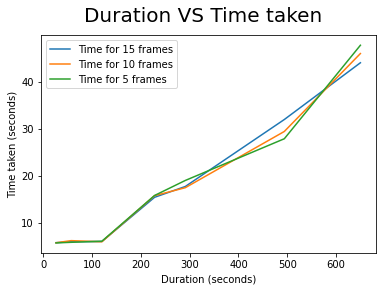

In [16]:
# plotting duration vs time

plt.plot(df["Duration"],df["Time for 15 frames"])
plt.plot(df["Duration"],df["Time for 10 frames"])
plt.plot(df["Duration"],df["Time for 5 frames"])

plt.legend(['Time for 15 frames', 'Time for 10 frames', 'Time for 5 frames'], loc='upper left')
plt.xlabel('Duration (seconds)')
plt.ylabel('Time taken (seconds)')
plt.suptitle('Duration VS Time taken', fontsize=20)

plt.show()

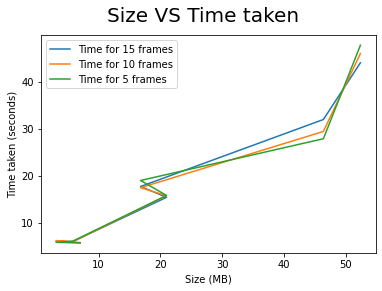

In [17]:
# plotting size vs time

plt.plot(df["Size"],df["Time for 15 frames"])
plt.plot(df["Size"],df["Time for 10 frames"])
plt.plot(df["Size"],df["Time for 5 frames"])

plt.legend(['Time for 15 frames', 'Time for 10 frames', 'Time for 5 frames'], loc='upper left')
plt.xlabel('Size (MB)')
plt.ylabel('Time taken (seconds)')
plt.suptitle('Size VS Time taken', fontsize=20)

plt.show()

### Results 

As we can see, the library performs fairly well with increase in size and duration of videos provided. There is not much difference between time taken to extract 5,10 or 15 frames from the same video. However, we did notice that running the notebook again gave timings with a difference of ± 4seconds, which could be costly depending on the size of your video and the speed at which you want to evaluate the kay frames. 

### What next?

Using the extracted key frames we can effectively summarise a large video into its most descriptive and distinct frames. We can hash these and combine them with other features  (audio, metadata etc) to get a cumulative video hash, which we can use for our video deduplication solution. 